# Analysis of YouTube Trending Videos of 2022_2023(US)

## Importing Libraries + Configurations

In [153]:
import pandas as pd
import numpy as np
import os
import requests
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mc
import seaborn as sns
from IPython.display import HTML
import re
from collections import Counter
from pprint import pprint
import random
import tempfile
import io
import time
from scipy.spatial import distance

In [154]:
def plot_conf(ax, xlbl='', ylbl='', t='', back_color='#ffffff', text_color='#616161', grid_color='#e9e9e9', 
              tick_color='', ticklbl_size=9, lbl_size=11, lang='en'):
    """
    This function perform operations to produce better-looking visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor(back_color)
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor=text_color, color=back_color)
    if tick_color != '':
        ax.tick_params(axis='both', color=tick_color)
    ax.tick_params(axis='both', which='major', labelsize=ticklbl_size)
    # adding a grid and specifying its color
    ax.grid(True, color=grid_color)
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color(back_color)
    ax.spines['top'].set_color(back_color) 
    ax.spines['right'].set_color(back_color)
    ax.spines['left'].set_color(back_color)
    # setting the title, x label, and y label of the plot
    if lang == 'ar':
        ax.set_title(get_display(reshaper.reshape(t)), fontweight='bold', family='Amiri',
                     fontsize=14, color=text_color, loc='right', pad=24);
        ax.set_xlabel(get_display(reshaper.reshape(xlbl)), fontweight='bold', family='Amiri',
                      labelpad=16, fontsize=lbl_size, color=text_color, fontstyle='italic');
        ax.set_ylabel(get_display(reshaper.reshape(ylbl)), fontweight='bold', family='Amiri',
                      color=text_color, labelpad=16, fontsize=lbl_size, fontstyle='italic');
    else:
        ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
        ax.set_xlabel(xlbl, labelpad=16, fontsize=lbl_size, color='#616161', fontstyle='italic');
        ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=lbl_size, fontstyle='italic');
        
        
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
def change_height(ax, new_value) :
    for patch in ax.patches :
        current_height = patch.get_height()
        diff = current_height - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_y(patch.get_y() + diff * .5)
        
        
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_colwidth', None)

def highlight_max(s):
    return ['background-color: rgba(255, 69, 00, {})'.format(x/s.max()) if (x/s.max()) > 0.1 else 'background-color: rgba(255, 69, 00, 0.1)' for x in s]

styles = [
    dict(selector="td, th", props=[("border", "0px solid #333"), ("padding", "6px"), ("max-width", "200px")]),
    # dict(selector="th.col_heading", props=[("background", "#ff0000"), ("color", "#b58900"), ("padding", "10px 16px")]),
    dict(selector="th.row_heading", props=[("background", "#E32400"), ("color", "white"), ("text-align", "left")]),
    dict(selector="tr:nth-child(even)", props=[("background", "#EFEFEF")]),
    dict(selector="tr:nth-child(odd)", props=[("background", "#ffffff")]),
    dict(selector=".col_heading", props=[("display", "none")]),
    dict(selector=".blank.level0", props=[("display", "none")]),
]
THEME_COL = '#602f6b'

## Reading Data into Dataframe 

In [155]:
df = pd.read_csv('data2022_2023.csv')
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')

## Trending Videos and Views

### Maximum view count of a trending video

In [163]:
# trending video with max view count
df[df['view_count'] == df['view_count'].max()].transpose()

,50597
Unnamed: 0,50598
video_id,gQlMMD8auMs
title,BLACKPINK - ‘Pink Venom’ M/V
publishedAt,2022-08-19T04:00:13Z
channelTitle,BLACKPINK
trending_date,2022-09-10 00:00:00
view_count,277791741
likes,12993894
comment_count,3534337


![](2.png)

### View-count distribution

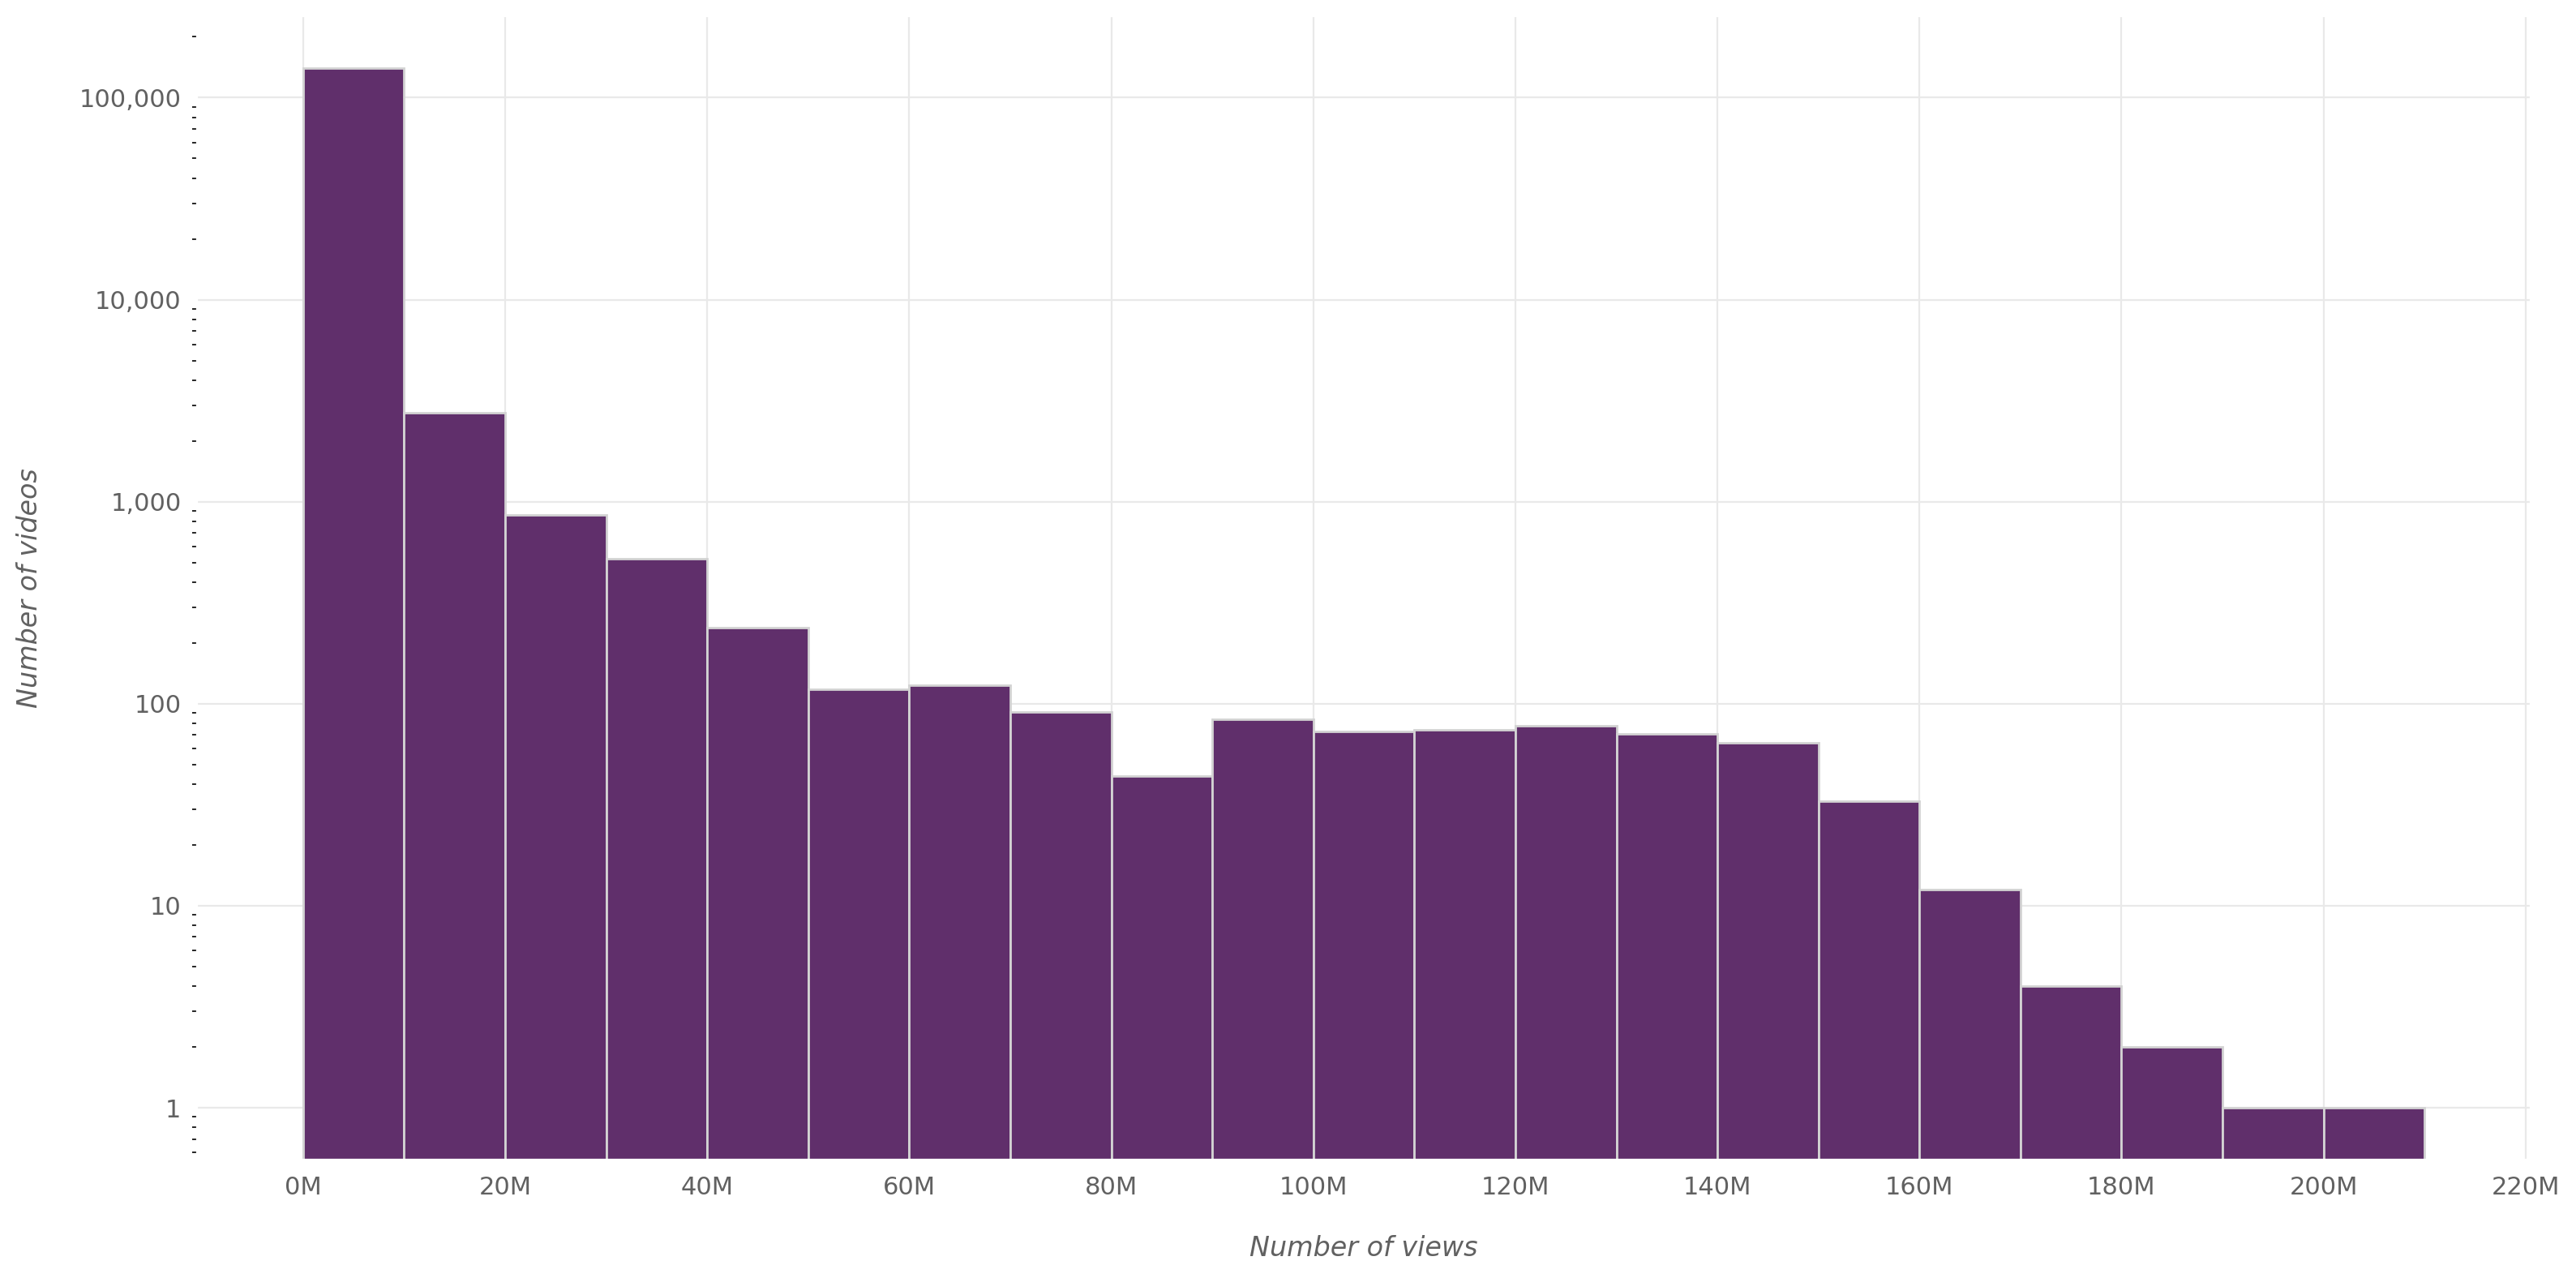

In [164]:
ax = df['view_count'].plot(kind='hist', bins=np.arange(0, 220e6, 10e6)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray', color=THEME_COL);
plot_conf(ax, xlbl='Number of views', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('D:\YtProject/yta2-view-dist.png', dpi=300)

In [165]:
df[df['view_count'] < 10_000_000].shape[0] / df.shape[0] * 100

96.38075429075181

### Trending videos with most views

Note that the following list contains unique videos because the table might contain multiple records for the same video in case the video was on the trending list for more than one day.

In [166]:
df.sort_values(by='view_count', ascending=False).drop_duplicates(subset=['video_id']).head()

,Unnamed: 0,video_id,title,publishedAt,channelTitle,trending_date,view_count,likes,comment_count
50597,50598,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,BLACKPINK,2022-09-10,277791741,12993894,3534337
57595,57596,POe9SOEKotk,BLACKPINK - ‘Shut Down’ M/V,2022-09-16T04:00:12Z,BLACKPINK,2022-10-15,180654898,8438151,1326586
96787,96788,YudHcBIxlYw,JISOO - ‘꽃(FLOWER)’ M/V,2023-03-31T04:00:14Z,BLACKPINK,2023-04-29,170333822,8553612,1162689
111575,111576,48h57PspBec,"$1 vs $1,000,000,000 Yacht!",2023-06-10T16:00:00Z,MrBeast,2023-07-14,161762628,5085547,136249
145085,145086,QdBZY2fkU-0,Grand Theft Auto VI Trailer 1,2023-12-04T23:07:10Z,Rockstar Games,2023-12-30,161257513,11111384,841295


### Trending videos with least views

Excluding 0-views videos.

In [167]:
(df[df['view_count'] > 0].sort_values(by='view_count', ascending=True).drop_duplicates(subset=['video_id']).head(5))

,Unnamed: 0,video_id,title,publishedAt,channelTitle,trending_date,view_count,likes,comment_count
117085,117086,SoTTr5ImOsA,Devon Cole - D**khead (Official Video),2023-08-11T04:00:11Z,DevonColeVEVO,2023-08-11,2658,648,68
88262,88263,Dzae8l3FQng,Taleban Dooda - Come After Me (Official Music Video),2023-03-17T20:00:09Z,Taleban Dooda,2023-03-18,5835,762,53
95055,95056,51z16hgJk7Y,Ari Abdul - You (Official Video),2023-04-21T04:00:07Z,AriAbdulVEVO,2023-04-21,7400,1890,228
121248,121249,8CaRIll0cvI,Yella Beezy - HA HA (Official Video),2023-09-01T04:38:42Z,Yella Beezy,2023-09-01,17238,769,80
107638,107639,lJ3fkULgtO4,Busta Rhymes - BEACH BALL (Official Music Video) ft. BIA,2023-06-23T04:00:08Z,BustaRhymesVEVO,2023-06-23,19751,3061,241


## Trending for 30 Days!

### Videos that appeared on the trending list the most

In [168]:
videos_appeared_most = df.groupby('video_id').size().sort_values(ascending=False).head(10)
indexes = videos_appeared_most.index.values
tdf = df[df['video_id'].isin(indexes)].sort_values(
    by='trending_date', ascending=True).drop_duplicates(subset=['video_id'])
tdf['trending_days'] = tdf['video_id'].map(videos_appeared_most)
tdf.sort_values(by='trending_days', ascending=False, inplace=True)
tdf = tdf[['video_id', 'title', 'trending_days', 'view_count', 'likes', 'comment_count']]
tdf.rename(columns={'trending_date': 'first_trending_date'}, inplace=True)
tdf

,video_id,title,trending_days,view_count,likes,comment_count
129796,3ryID_SwU5E,"$1 Vs $100,000,000 House!",37,55310532,2912914,93589
118797,J_z-W4UVHkw,"Every Country On Earth Fights For $250,000!",36,51663523,3232311,226636
115997,yhB3BgJyGl8,7 Days Stranded At Sea,35,41936974,2843898,76760
124197,KrLj6nc516A,"$1 Vs $100,000,000 Car!",35,45084862,2874394,78984
8800,gdsUKphmB3Y,"Dr. Dre, Snoop Dogg, Eminem, Mary J. Blige & Kendrick Lamar FULL Pepsi Super Bowl LVI Halftime Show",33,12917585,685967,55980
17400,myjEoDypUD8,"Watch the uncensored moment Will Smith smacks Chris Rock on stage at the Oscars, drops F-bomb",33,69880692,965557,201533
81600,HjBo--1n8lI,Rihanna’s FULL Apple Music Super Bowl LVII Halftime Show,33,6700452,528287,32979
94408,6K5XD84Mf-o,GOLDEN BUZZER is one of the BEST VOICES Simon's ever heard | Auditions | BGT 2023,33,2111062,42754,3031
104598,Wyb0ExKOE4w,Golden Buzzer: Putri Ariani receives the GOLDEN BUZZER from Simon Cowell | Auditions | AGT 2023,33,8459692,588890,70822
122797,HeZO_LcQALI,SIDEMEN CHARITY MATCH 2023 [OFFICIAL STREAM],33,18099004,685242,8098


We see videos that were published in the first 3 days of the year!

## Most Popular Publishing Day for Trending Videos

In [169]:
tmp_publishedAt = df['publishedAt'].copy()
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [170]:
df["publishing_day"] = df["publishedAt"].dt.day_name()
df["publishing_hour"] = df["publishedAt"].dt.hour

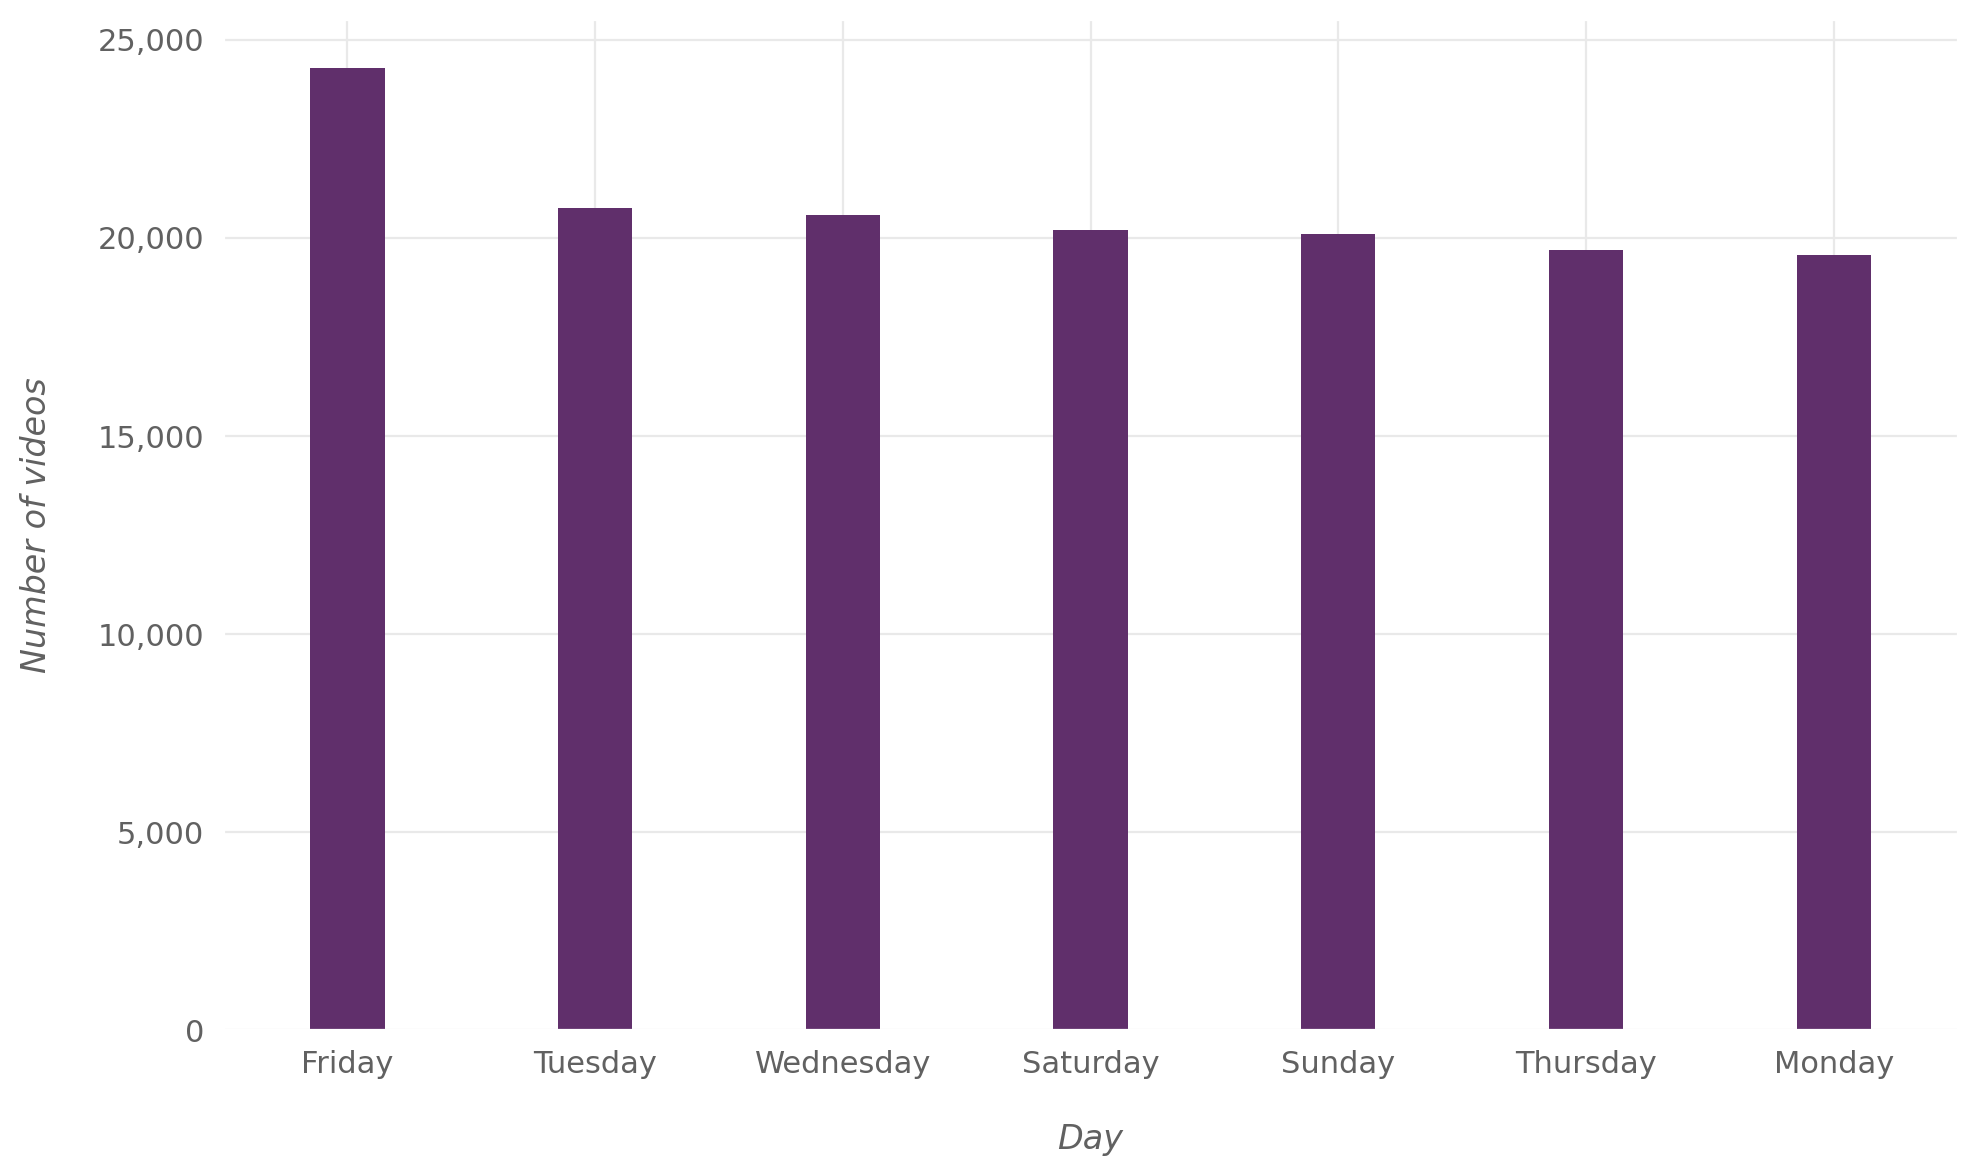

In [171]:
ax = df['publishing_day'].value_counts().plot(
    kind='bar', figsize=(10,6), rot=0, color=THEME_COL)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plot_conf(ax, xlbl='Day', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
change_width(ax, .3)
plt.tight_layout()
plt.savefig('D:\YtProject/yta2-popdays.png', dpi=300)

In [172]:
df['publishing_day'].value_counts()

publishing_day
Friday       24289
Tuesday      20764
Wednesday    20586
Saturday     20201
Sunday       20104
Thursday     19686
Monday       19566
Name: count, dtype: int64

## Most Popular Publishing Hour for Trending Videos

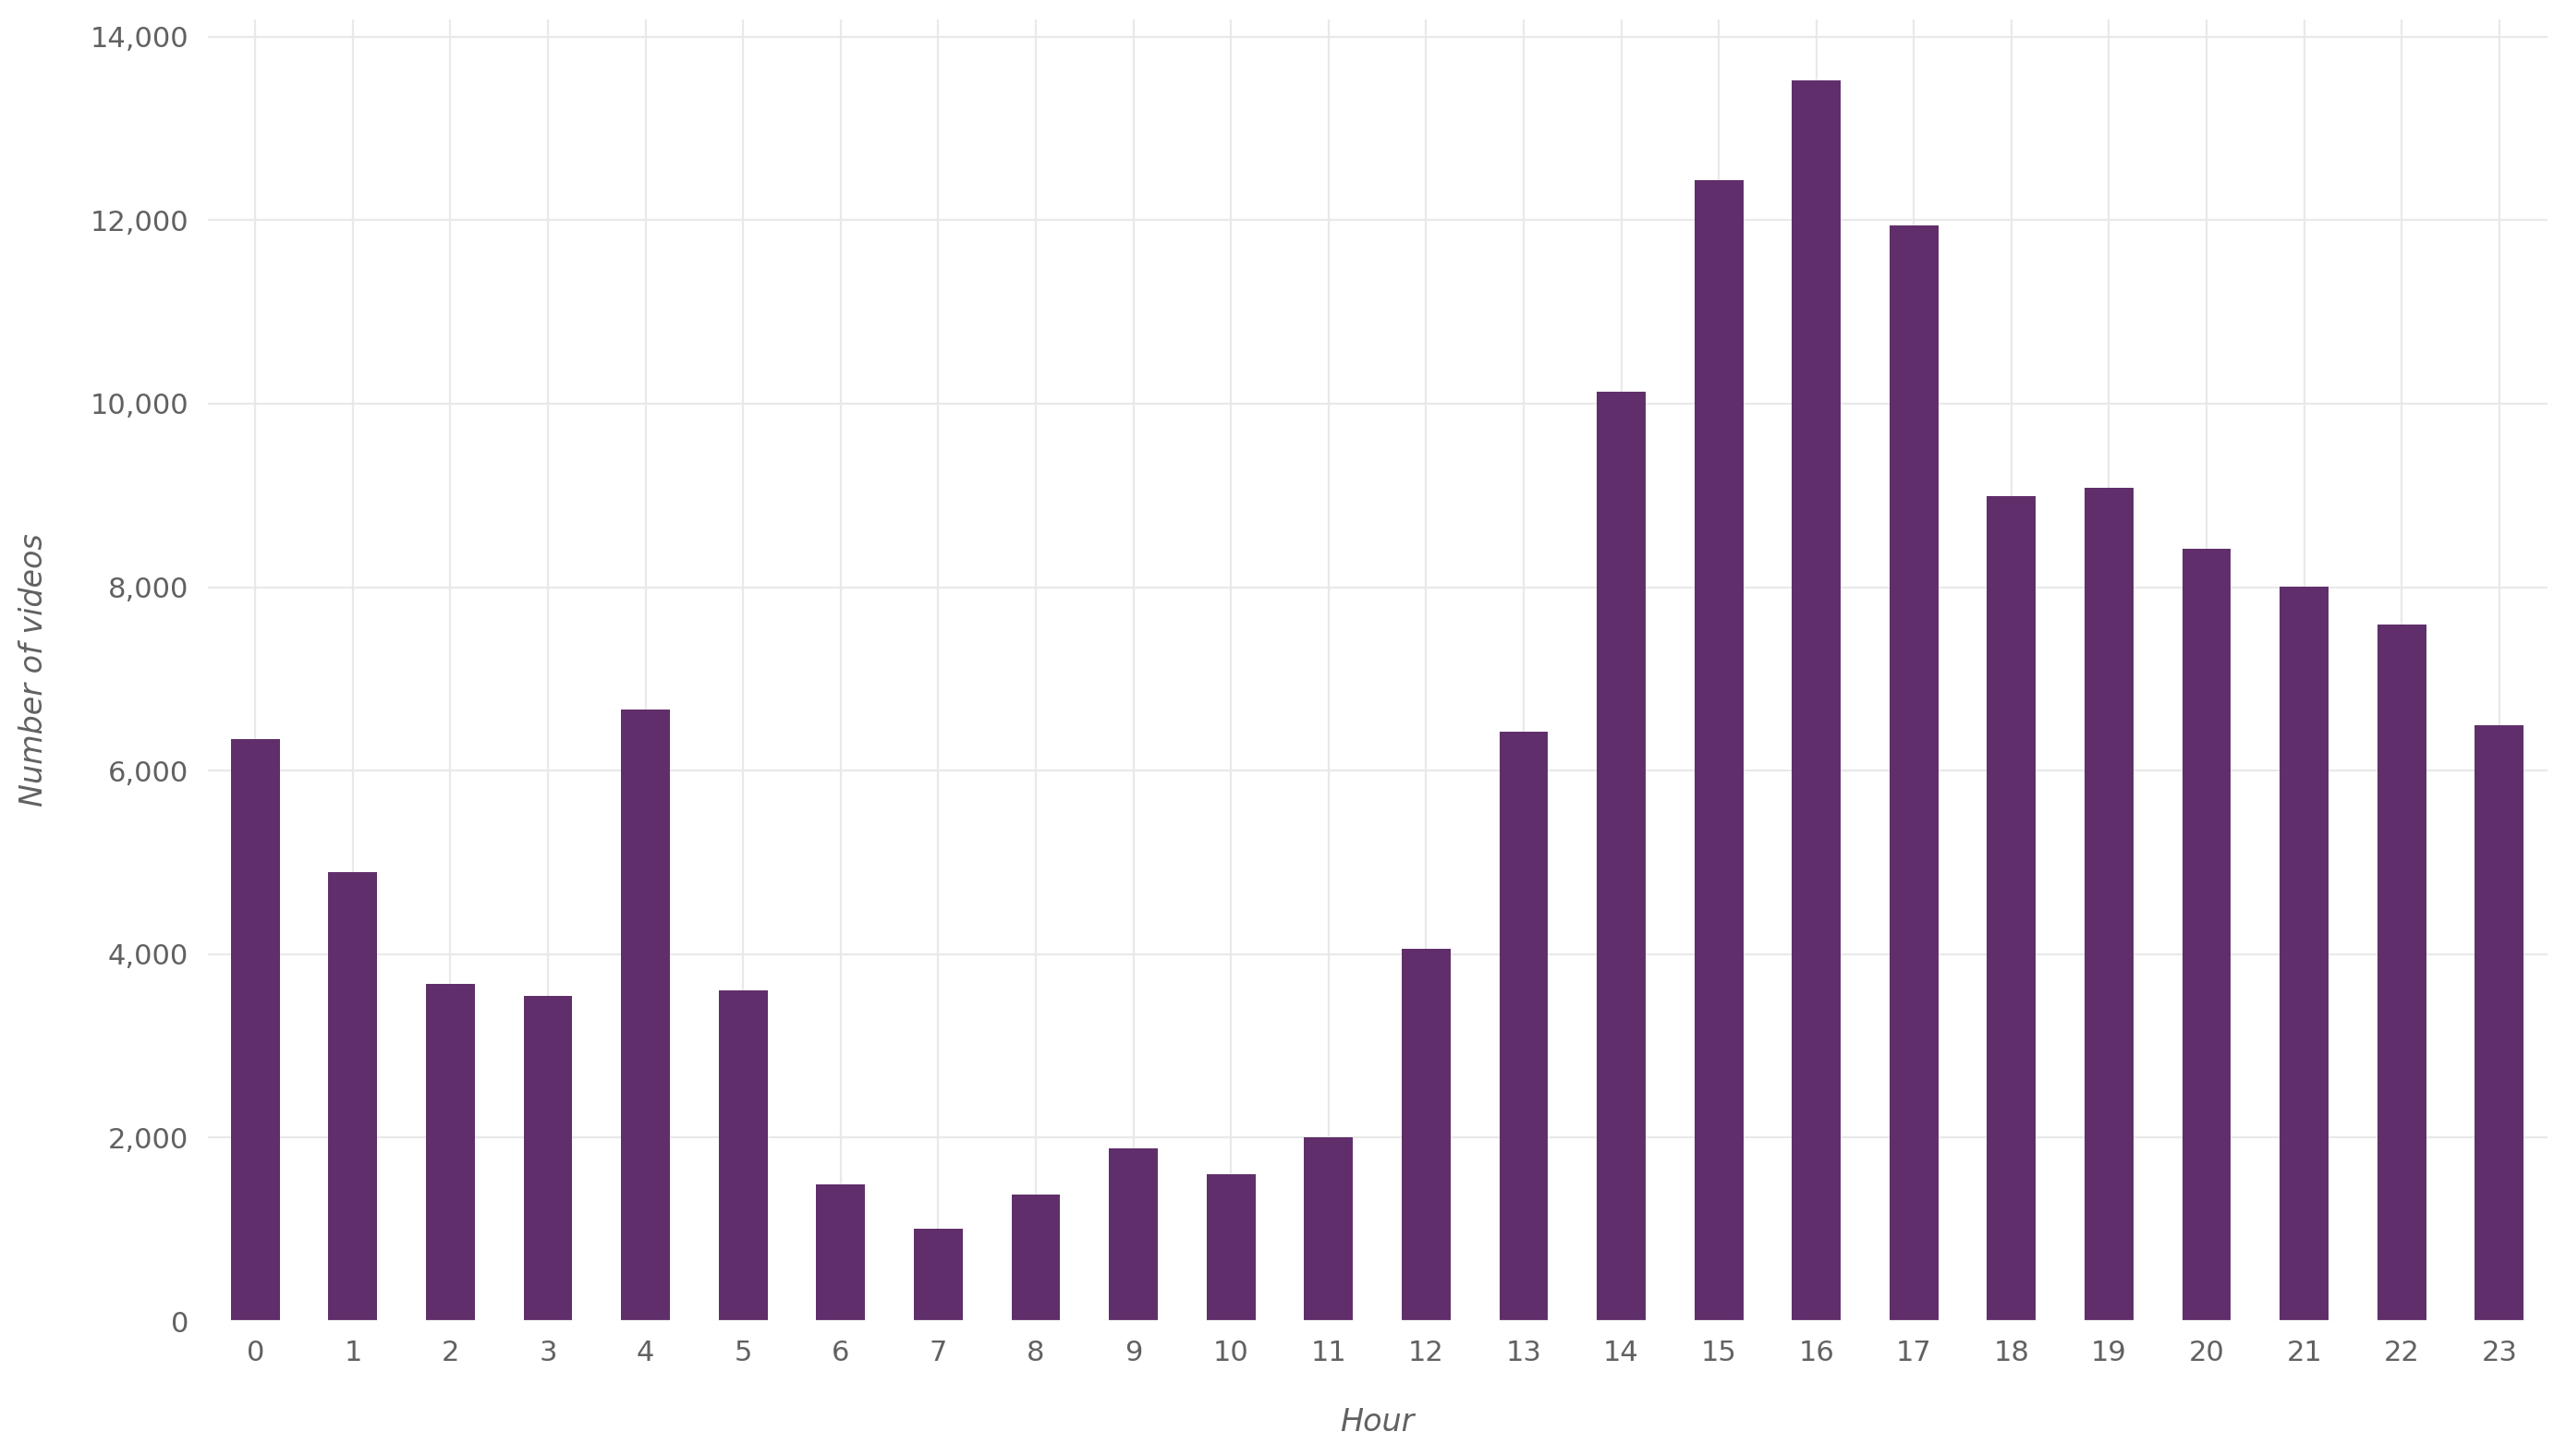

In [173]:
ax = df['publishing_hour'].value_counts().sort_index().plot(
    kind='bar', figsize=(14,8), rot=0, color=THEME_COL)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plot_conf(ax, xlbl='Hour', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
# change_width(ax, .3)
plt.tight_layout()
plt.savefig('D:\YtProject\yta2-pophours.png', dpi=300)

In [174]:
df['publishing_hour'].value_counts()

publishing_hour
16    13522
15    12437
17    11946
14    10128
19     9082
18     8996
20     8418
21     8004
22     7588
4      6665
23     6492
13     6425
0      6343
1      4890
12     4057
2      3681
5      3603
3      3541
11     2008
9      1889
10     1601
6      1493
8      1380
7      1007
Name: count, dtype: int64

## Trending Videos Comments

### Comment count distribution

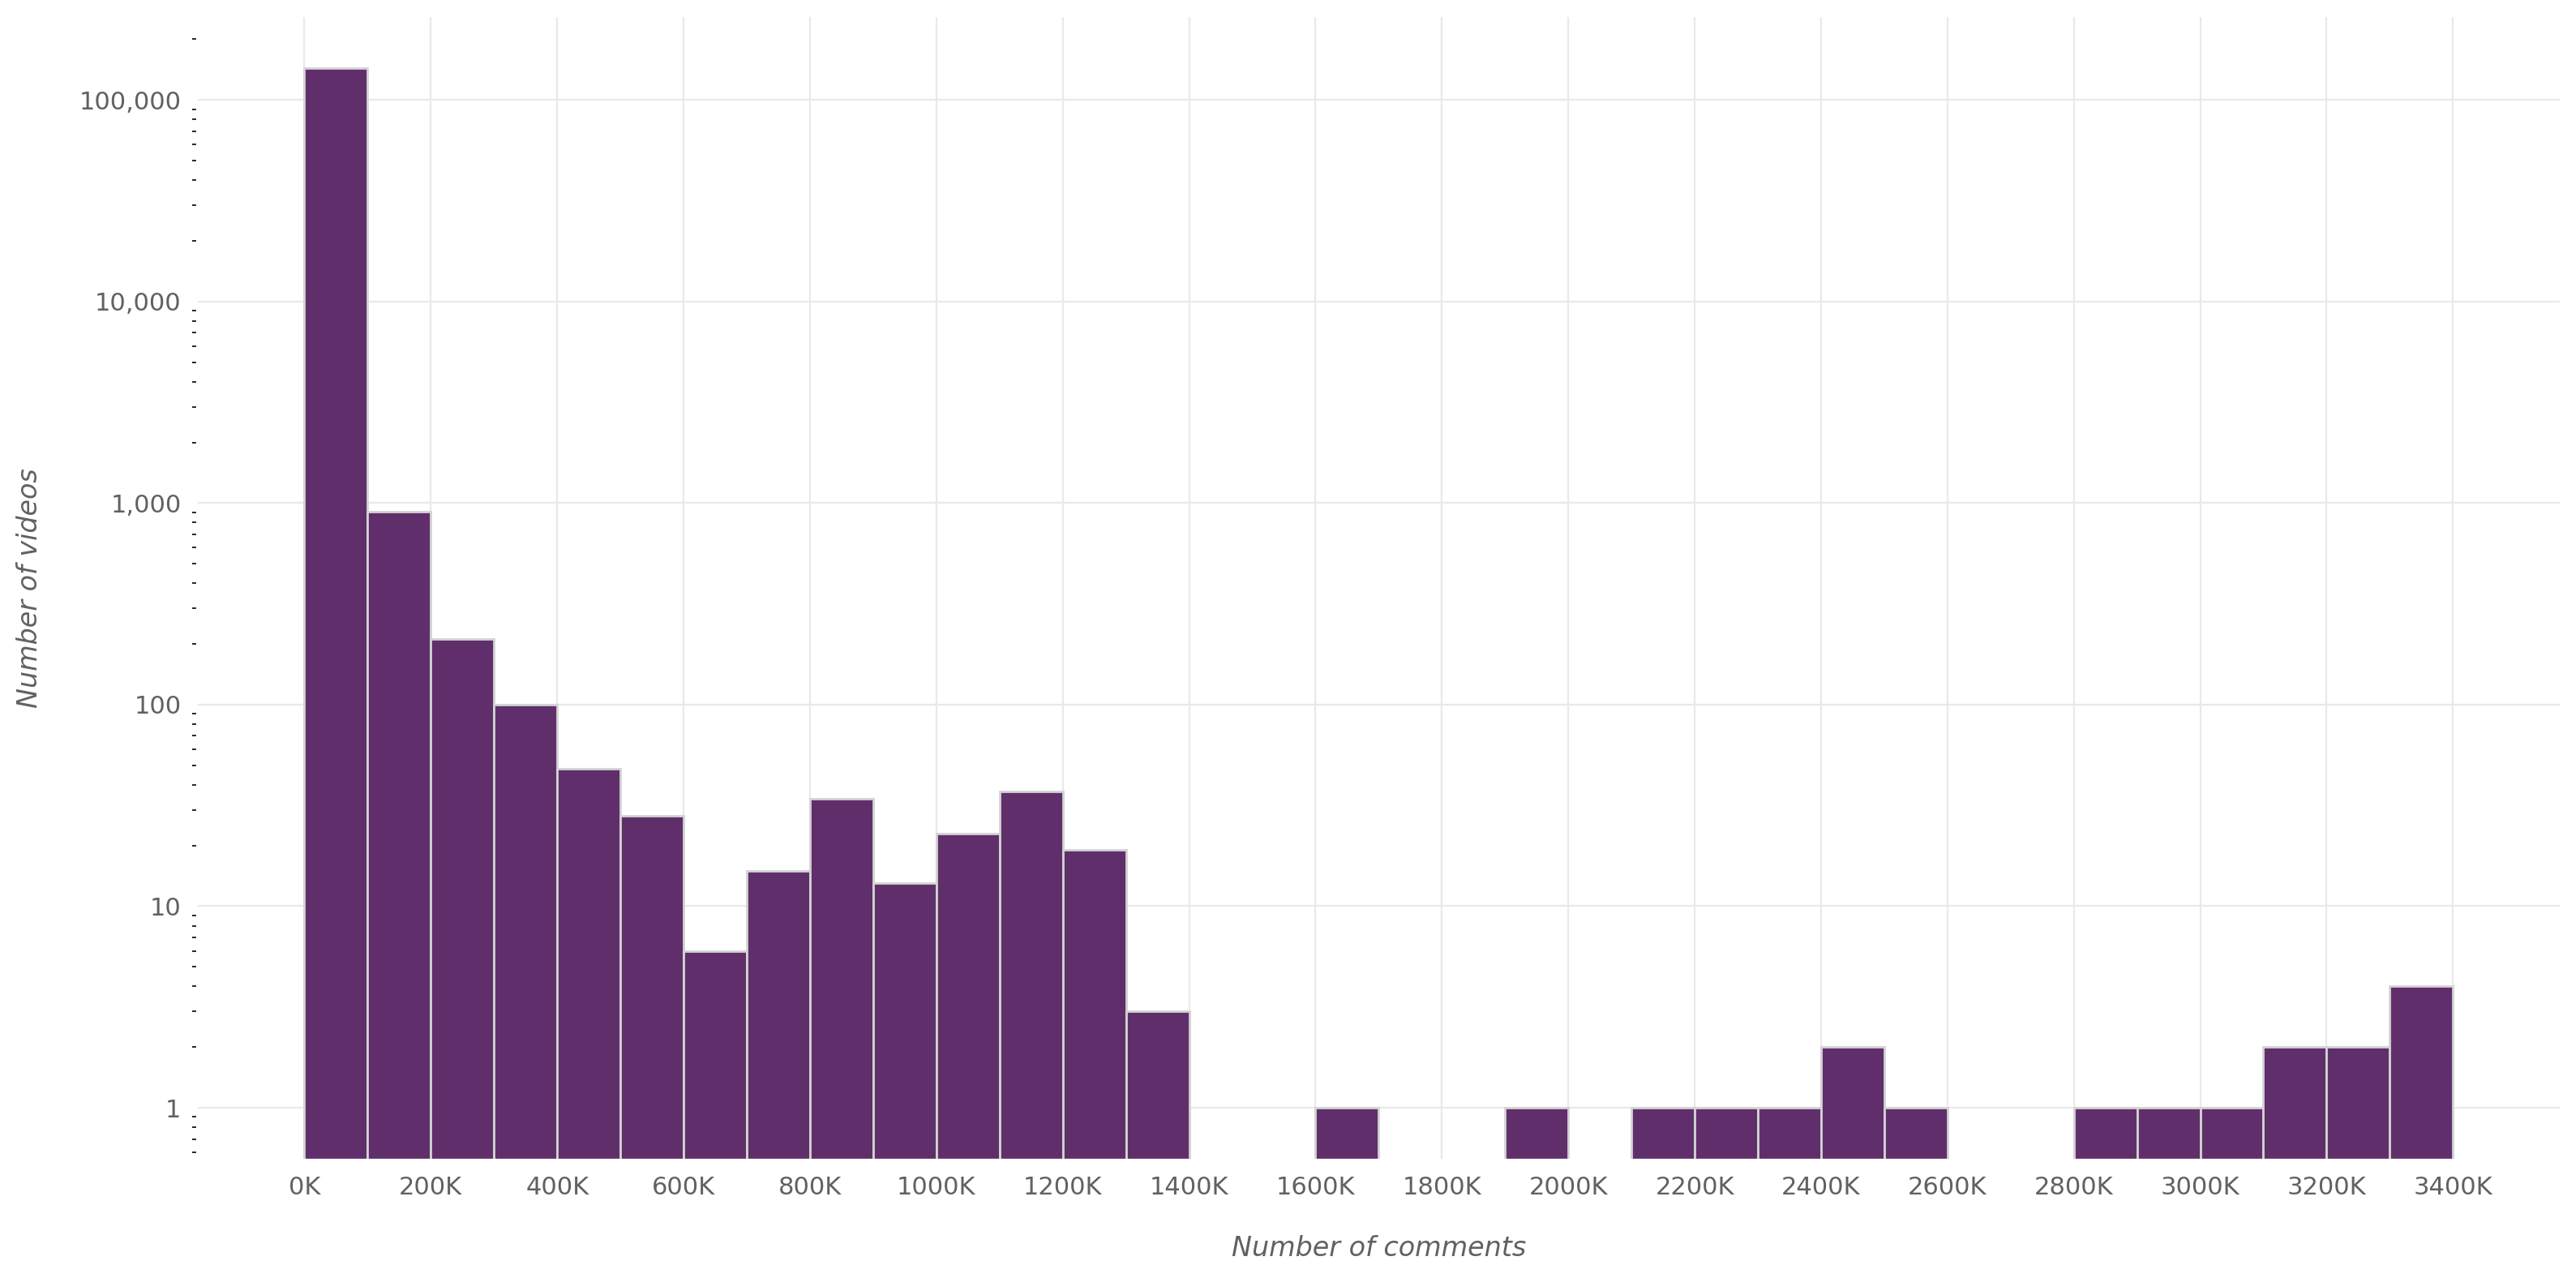

In [175]:
ax = df['comment_count'].plot(kind='hist', bins=np.arange(0, 3.5e6, 1e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray', color=THEME_COL);
plot_conf(ax, xlbl='Number of comments', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x/1e3))
ax.xaxis.set_major_locator(ticker.MultipleLocator(200000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('D:\YtProject\yta2-comm-dist.png', dpi=300)

In [176]:
df[df['comment_count'] < 100_000].shape[0] / df.shape[0] * 100

98.98619796688614

In [177]:
df['comment_count'].quantile(q=0.9)

11713.0

In [178]:
df.sort_values(by='comment_count', ascending=False).drop_duplicates(subset=['video_id']).head()

,Unnamed: 0,video_id,title,publishedAt,channelTitle,trending_date,view_count,likes,comment_count,publishing_day,publishing_hour
50597,50598,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,BLACKPINK,2022-09-10,277791741,12993894,3534337,Friday,4
33585,33586,kXpOEzNZ8hQ,BTS (방탄소년단) 'Yet To Come (The Most Beautiful Moment)' Official MV,2022-06-10 03:59:38+00:00,HYBE LABELS,2022-06-17,93952431,9444379,2469783,Friday,3
57595,57596,POe9SOEKotk,BLACKPINK - ‘Shut Down’ M/V,2022-09-16 04:00:12+00:00,BLACKPINK,2022-10-15,180654898,8438151,1326586,Friday,4
38194,38195,DPMluEVUqS0,so long nerds,2022-07-01 01:29:02+00:00,Technoblade,2022-07-10,68010978,7676226,1280276,Friday,1
48998,48999,k6jqx9kZgPM,TWICE Talk that Talk M/V,2022-08-26 04:00:11+00:00,JYP Entertainment,2022-09-02,52410942,2168690,1241609,Friday,4


## How Long Does it Take a Video to Become Trending?

### How many days are between publishing a video and its appearance on the trending list?

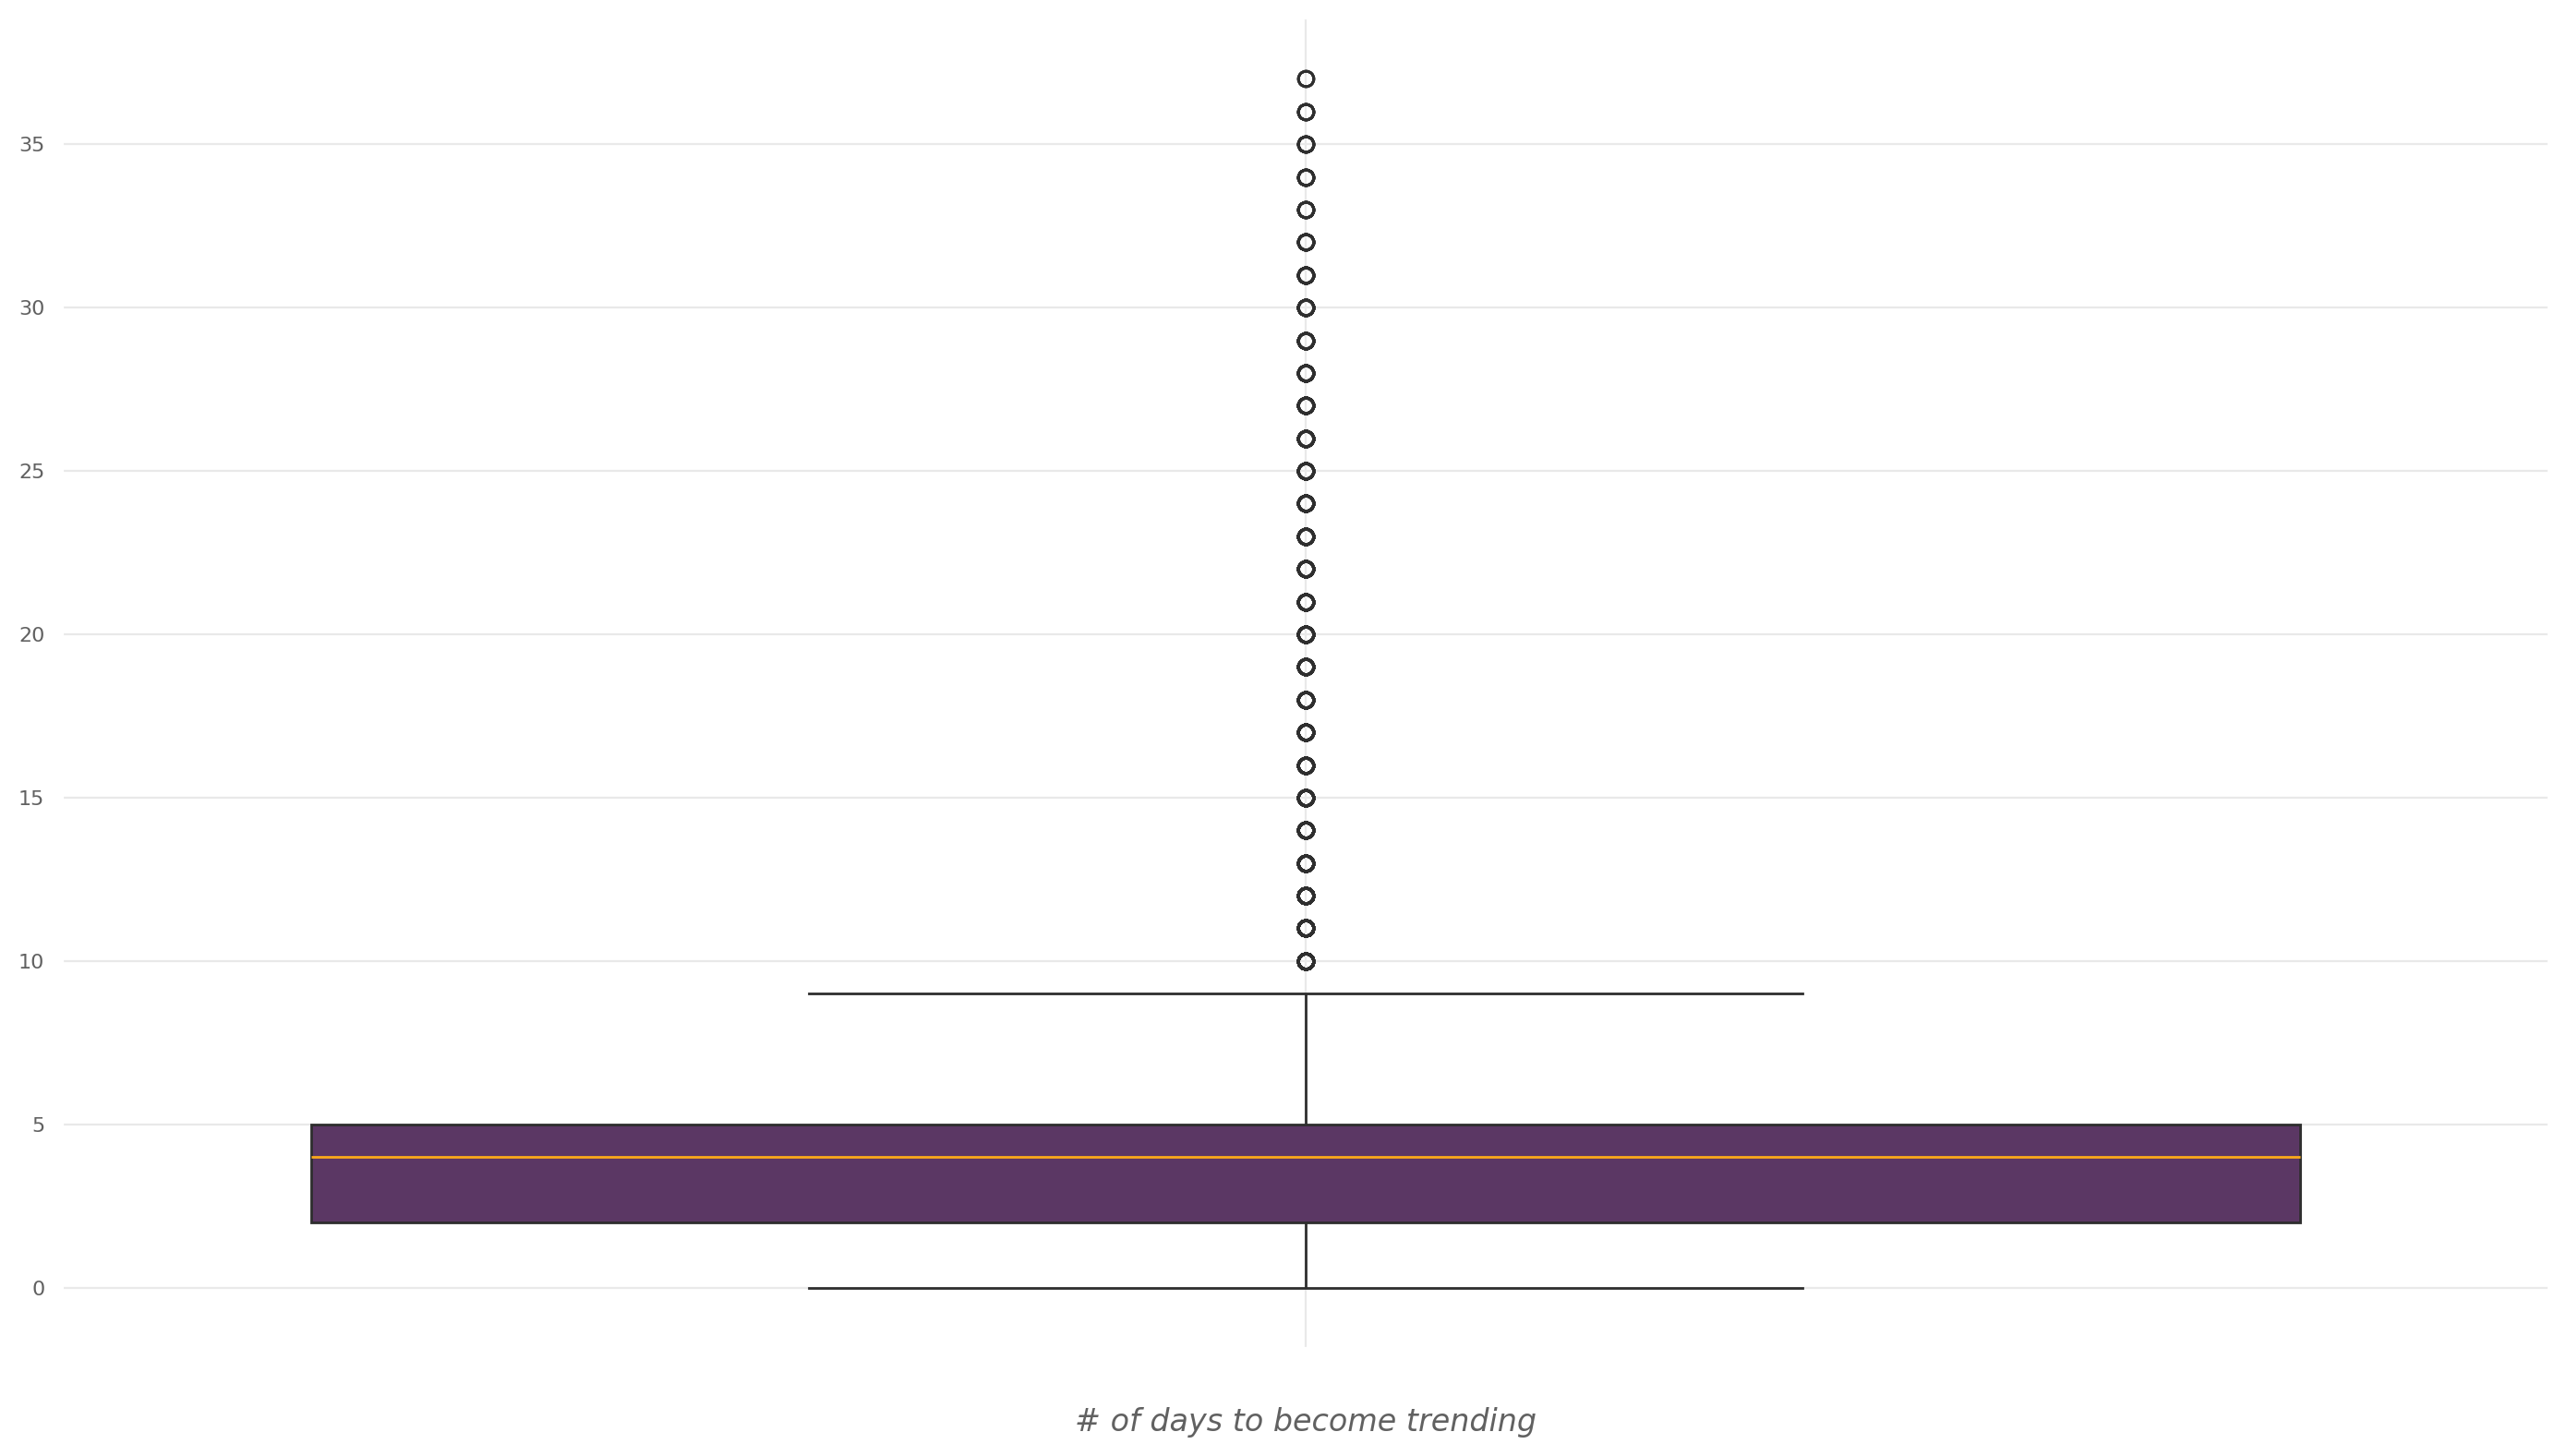

In [179]:
df['trending_date'] = pd.to_datetime(df['trending_date']).dt.strftime('%Y.%m.%d')
df['publishedAt'] = pd.to_datetime(df['publishedAt']).dt.strftime('%Y.%m.%d')
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
days = (df['trending_date'] - df['publishedAt']).dt.days
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(days, color=THEME_COL, medianprops={'color': '#FBA91A'})

plot_conf(ax, xlbl='# of days to become trending', ticklbl_size=8, lbl_size=12)
plt.tight_layout()
plt.savefig('D:\YtProject\yta2-days-trend.png', dpi=300)

In [180]:
days.describe()

count    145196.000000
mean          4.136829
std           2.552319
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max          37.000000
dtype: float64

In [181]:
days.quantile(q=0.95)

7.0

## Correlations of Trending Videos

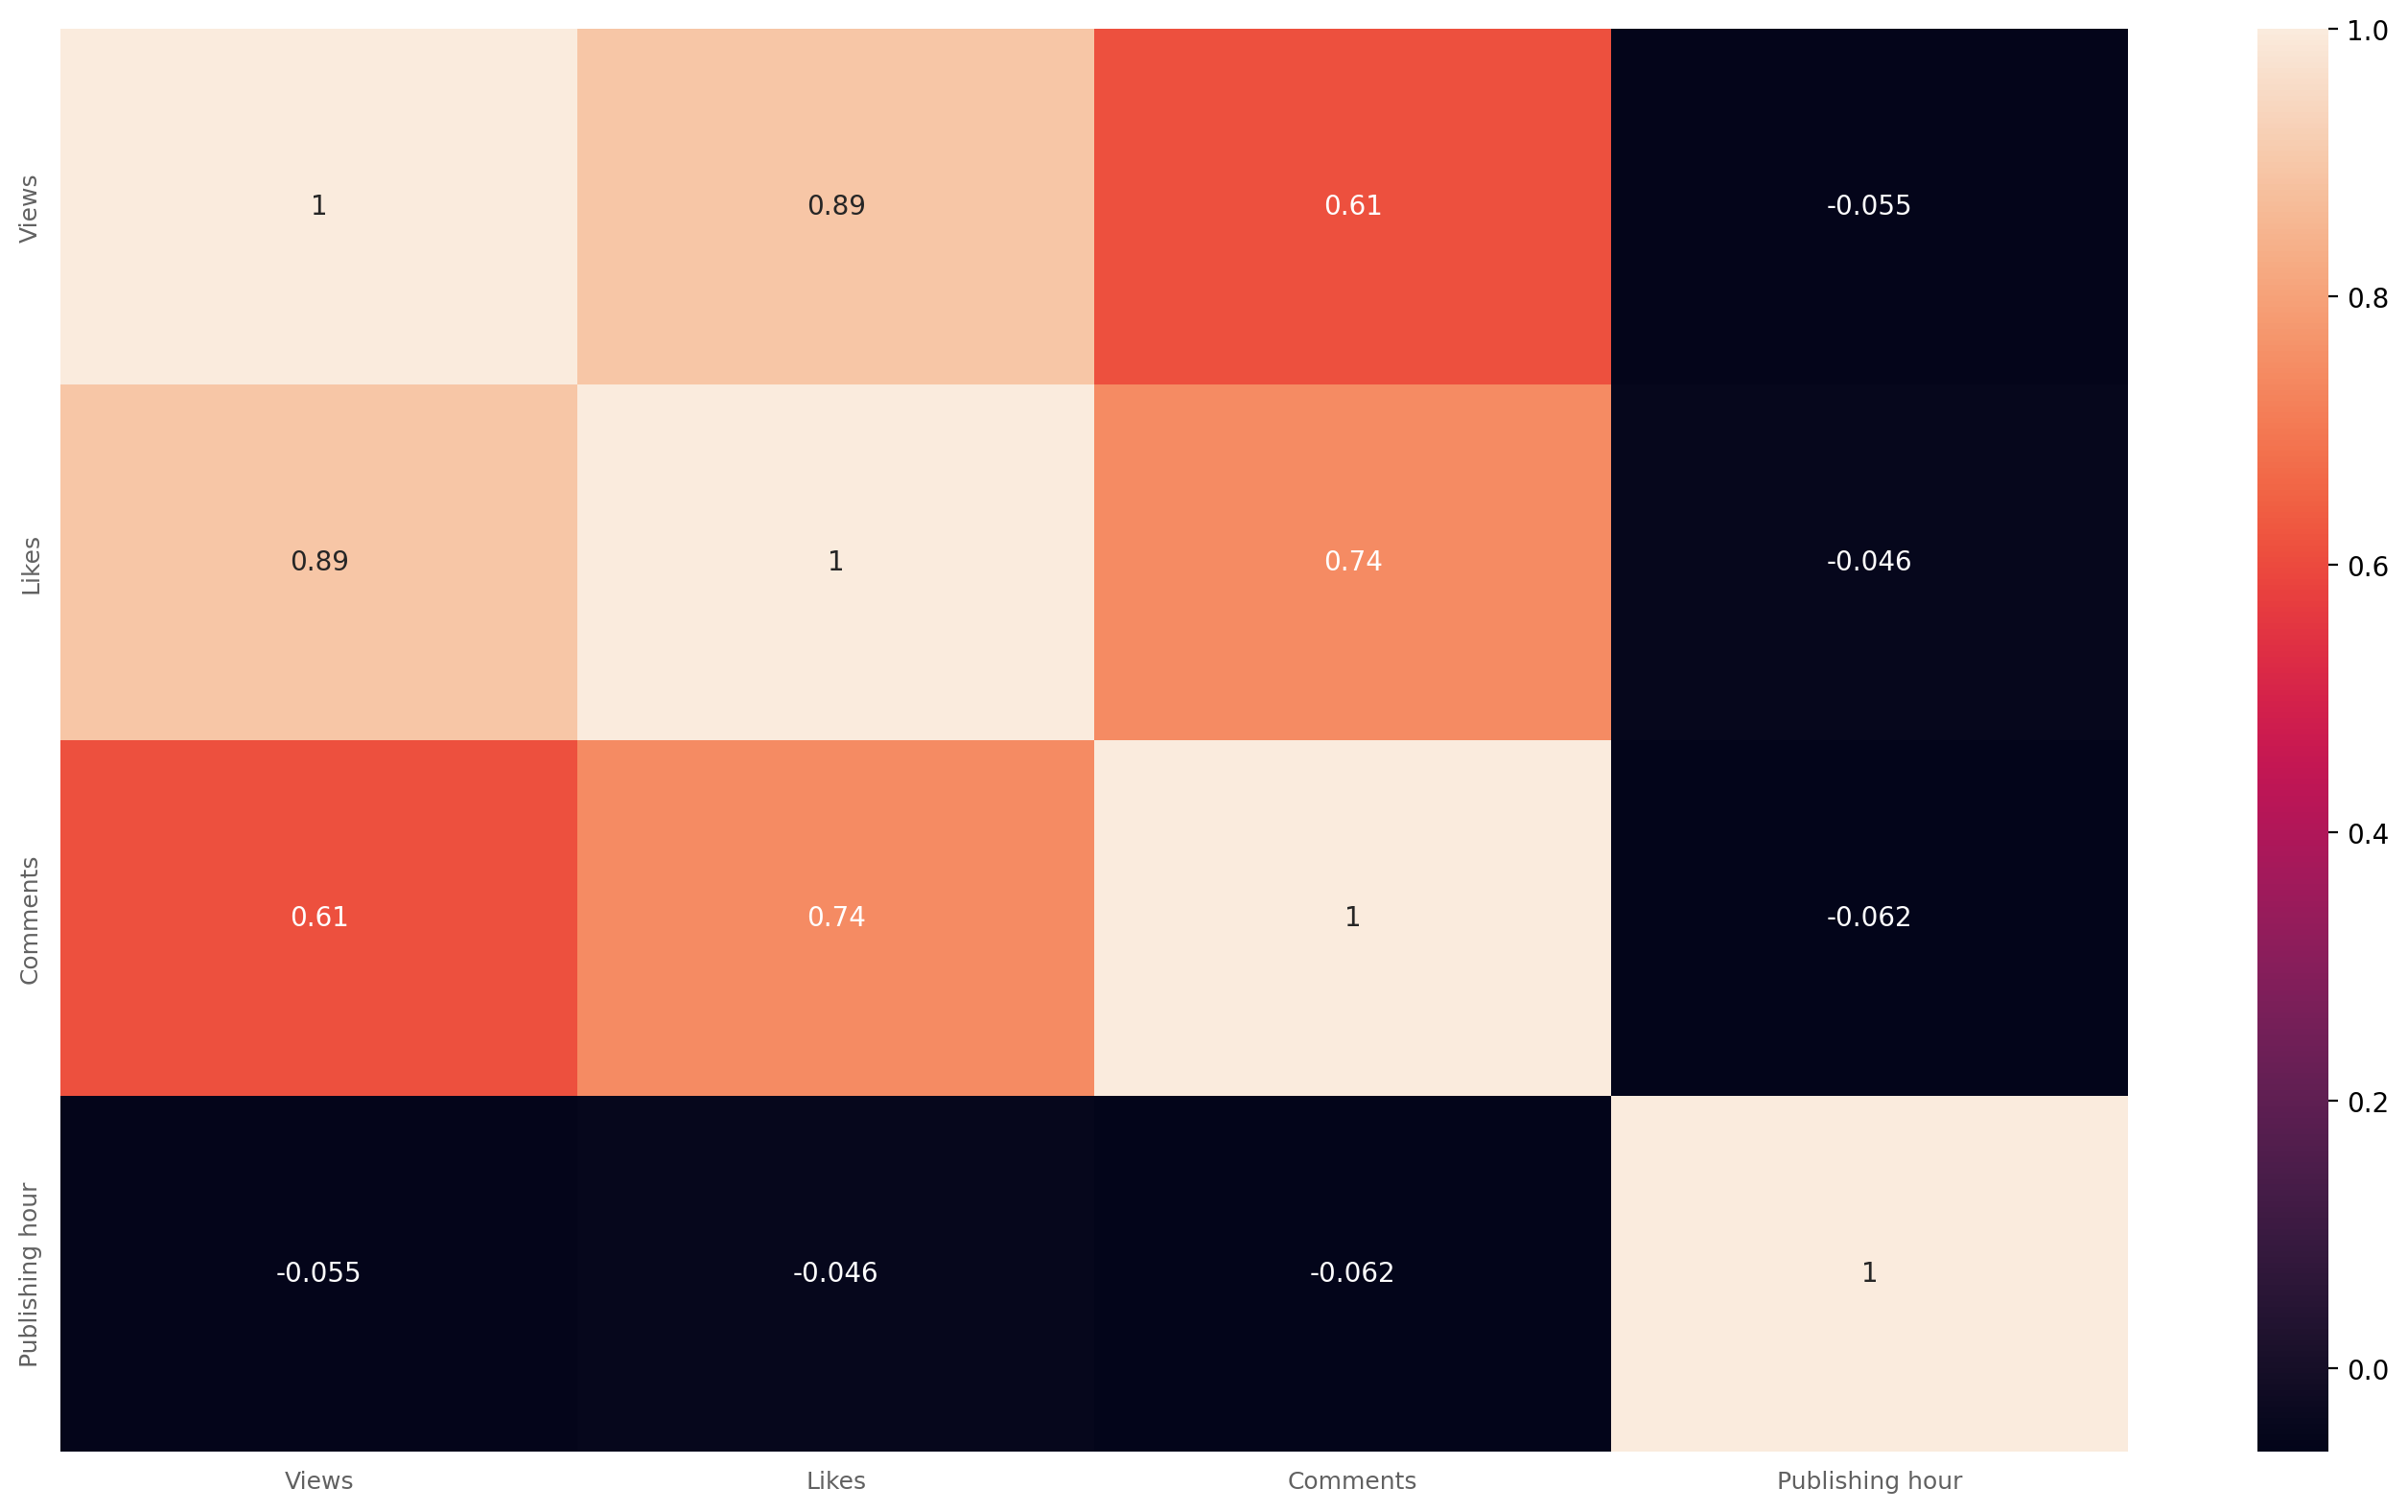

In [182]:
heatmap_columns = ['view_count', 'likes', 'comment_count', 'publishing_hour']

h_labels = ['Views', 'Likes', 'Comments', 'Publishing hour']

fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(df[heatmap_columns].corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels)
plot_conf(ax)
plt.tight_layout()
plt.savefig('D:\YtProject\yta2-corr.png', dpi=300)